# Merged Data

In [1]:
import pandas as pd
import ta
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

Data

In [2]:
data = pd.read_csv('../raw_data/BTCUSDT_daily.csv')
data = data.drop_duplicates(subset='timestamp')
data['timestamp'] = pd.to_datetime(data['timestamp'])


In [3]:
def data_check(data):
    print(f'Shape: {data.shape}')
    print(f'Duplicates: {data.duplicated().sum()}')
    print(f"Duplicate timestamps {data['timestamp'].duplicated().sum()}")
    print(f'Total amount of NaN: {data.isna().sum().sum()}')

In [4]:
data_check(data)

Shape: (1365, 6)
Duplicates: 0
Duplicate timestamps 0
Total amount of NaN: 0


## Indicators

### Volume Indicators

Imports

In [5]:
from ta.volume import ChaikinMoneyFlowIndicator
from ta.volume import ForceIndexIndicator
from ta.volume import MFIIndicator
from ta.volume import VolumeWeightedAveragePrice

Code

In [6]:
cmfi_indicator = ta.volume.ChaikinMoneyFlowIndicator(high = data["high"], low = data["low"], close = data["close"], volume = data["volume"])
cmfi_values = cmfi_indicator.chaikin_money_flow()
data['volume_CMF'] = cmfi_values

In [7]:
fii_indicator = ta.volume.ForceIndexIndicator(close = data["close"], volume = data["volume"])
fii_values = fii_indicator.force_index() 
data['volume_FII'] = fii_values

In [8]:
mfi_indicator = ta.volume.MFIIndicator(high = data["high"], low = data["low"], close = data["close"], volume = data["volume"])
mfi_values = mfi_indicator.money_flow_index() 
data['volume_MFI'] = mfi_values

In [9]:
vwa_indicator = ta.volume.VolumeWeightedAveragePrice(high = data["high"], low = data["low"], close = data["close"], volume = data["volume"])
vwa_values = vwa_indicator.volume_weighted_average_price() 
data['volume_VWA'] = vwa_values

In [10]:
data_check(data)

Shape: (1365, 10)
Duplicates: 0
Duplicate timestamps 0
Total amount of NaN: 58


### Momentum Indicators

Imports

In [11]:
from ta.momentum import AwesomeOscillatorIndicator
from ta.momentum import KAMAIndicator
from ta.momentum import PercentagePriceOscillator
from ta.momentum import PercentageVolumeOscillator
from ta.momentum import ROCIndicator
from ta.momentum import RSIIndicator
from ta.momentum import StochRSIIndicator
from ta.momentum import StochasticOscillator
from ta.momentum import TSIIndicator
from ta.momentum import UltimateOscillator
from ta.momentum import WilliamsRIndicator

Code

In [12]:
ao_indicator = ta.momentum.AwesomeOscillatorIndicator(data["high"], data["low"])
ao_values = ao_indicator.awesome_oscillator()
data['mom_AOI'] = ao_values

In [13]:
# kama_indicator = KAMAIndicator(close=data['close'])
# kama_values = kama_indicator.kama()
# data['mom_KAMA'] = kama_values

In [14]:
ppo_indicator = PercentagePriceOscillator(close=data['close'])
ppo_values = ppo_indicator.ppo()
data['mom_PPO'] = ppo_values
ppo_signal_values = ppo_indicator.ppo_signal()
data['mom_PPO_signal'] = ppo_signal_values

In [15]:
pvo_indicator = PercentageVolumeOscillator(volume=data['volume'])
pvo_values = pvo_indicator.pvo()
data['mom_PVO'] = pvo_values
pvo_signal_values = pvo_indicator.pvo_signal()
data['mom_PVO_signal'] = pvo_signal_values

In [16]:
roc_indicator = ROCIndicator(close=data['close'])
roc_values = roc_indicator.roc()
data['mom_ROC'] = roc_values

In [17]:
rsi_indicator = RSIIndicator(close=data['close'])
rsi_values = rsi_indicator.rsi()
data['mom_rsi'] = rsi_values

In [18]:
srsi_indicator = StochRSIIndicator(close=data['close'])
srsi_values = srsi_indicator.stochrsi()
data['mom_stoch_RSI'] = srsi_values

In [19]:
so_indicator = StochasticOscillator(high = data["high"], low = data["low"], close = data['close'])
so_values = so_indicator.stoch()
data["mom_StochOscillator"] = so_values
so_signal_values = so_indicator.stoch_signal()
data['mom_StochOscillator_signal'] = so_signal_values

In [20]:
tsi_indicator = TSIIndicator(close=data['close'])
tsi_values = tsi_indicator.tsi()
data['mom_TSI'] = tsi_values

In [21]:
uo_indicator = UltimateOscillator(high = data["high"], low = data["low"], close = data['close'])
uo_values = uo_indicator.ultimate_oscillator()
data["mom_UltimateOscillator"] = uo_values

In [22]:
wri_indicator = WilliamsRIndicator(high = data["high"], low = data["low"], close = data['close'])
wri_values = wri_indicator.williams_r()
data["mom_WilliamsRIndicator"] = wri_values

In [23]:
data_check(data)

Shape: (1365, 23)
Duplicates: 0
Duplicate timestamps 0
Total amount of NaN: 364


In [24]:
# msno.matrix(data[:500])

### Volatility Indicator

Imports

In [25]:
from ta.volatility import AverageTrueRange
from ta.volatility import BollingerBands
from ta.volatility import keltner_channel_wband
from ta.volatility import keltner_channel_pband
from ta.volatility import keltner_channel_mband
from ta.volatility import donchian_channel_lband
from ta.volatility import donchian_channel_hband
from ta.volatility import donchian_channel_mband
from ta.volatility import donchian_channel_wband
from ta.volatility import ulcer_index

Code

In [26]:
# Average True Range

atr_indicator = AverageTrueRange(high = data["high"], low = data["low"], close = data['close'], window=14)
atr_values = atr_indicator.average_true_range()
data['volat_ATR'] = atr_values

In [27]:
atr_values

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
1360    854.472960
1361    864.796320
1362    856.446583
1363    853.300398
1364    823.793227
Name: atr, Length: 1365, dtype: float64

In [28]:
# Bollinger Indications

bol_indicator = BollingerBands(close=data['close'])

data['volat_bol_hband_binary'] = bol_indicator.bollinger_hband_indicator()
data['volat_bol_lband_binary'] = bol_indicator.bollinger_lband_indicator()
data['volat_bol_band_width'] = bol_indicator.bollinger_wband()

In [29]:
# Keltner Channels

kcw_indicator = keltner_channel_wband(high = data["high"], low = data["low"], close = data['close'])
data['KCW'] = kcw_indicator

kcp_indicator = keltner_channel_pband(high = data["high"], low = data["low"], close = data['close'])
data['KCP'] = kcp_indicator

# Perfect Correlation
# kcm_indicator = keltner_channel_mband(high = data["high"], low = data["low"], close = data['close'])
# data['KCM'] = kcm_indicator

In [30]:
# Donchian channels

dcw_indicator = donchian_channel_wband(high=data["high"], low=data['low'], close=data['close'])
data['donch_DCW'] = dcw_indicator

# Highly correlated
# dcl_indicator = donchian_channel_lband(high = data["high"], low = data["low"], close = data['close'])
# data["DCL"] = dcl_indicator

# dch_indicator = donchian_channel_hband(high = data["high"], low = data["low"], close = data['close'])
# data['DCH'] = dch_indicator

# dcm_indicator = donchian_channel_mband(high = data["high"], low = data["low"], close = data['close'])
# data['DCM'] = dcm_indicator

In [31]:
# Ulcer

uli_indicator = ulcer_index(close = data['close'])
data['ULI'] = uli_indicator

In [32]:
data_check(data)

Shape: (1365, 31)
Duplicates: 0
Duplicate timestamps 0
Total amount of NaN: 424


### Trend Indicator

Imports

In [33]:
from ta.trend import ADXIndicator
from ta.trend import AroonIndicator
from ta.trend import CCIIndicator
from ta.trend import DPOIndicator
from ta.trend import EMAIndicator
from ta.trend import KSTIndicator
from ta.trend import MACD
from ta.trend import MassIndex
from ta.trend import PSARIndicator
from ta.trend import SMAIndicator
from ta.trend import STCIndicator
from ta.trend import TRIXIndicator
from ta.trend import VortexIndicator
from ta.trend import WMAIndicator

Code

In [34]:
data["ADX"] = ADXIndicator(high = data["high"], low = data["low"], close = data['close']).adx()
data["ADX_neg"] = ADXIndicator(high = data["high"], low = data["low"], close = data['close']).adx_neg()
data["ADX_pos"] = ADXIndicator(high = data["high"], low = data["low"], close = data['close']).adx_pos()

/home/lscr/.pyenv/versions/3.10.6/envs/assist_trader/lib/python3.10/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/home/lscr/.pyenv/versions/3.10.6/envs/assist_trader/lib/python3.10/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [35]:
data["ARI_down"] = AroonIndicator(close = data['close']).aroon_down()
data["ARI"] = AroonIndicator(close = data['close']).aroon_indicator()
data["ARI_up"] = AroonIndicator(close = data['close']).aroon_up()

In [36]:
data["CCI"] = CCIIndicator(high = data["high"], low = data["low"], close = data['close']).cci()

In [37]:
data["DPO"] = DPOIndicator(close = data['close']).dpo()

In [38]:
data["EMA_100"] = EMAIndicator(close = data['close'], window=100).ema_indicator()

def make_binary(feat, close):
    if close > feat:
        return 1
    else:
        return 0

data['EMA_100_binary'] = data.apply(lambda x: make_binary(x['EMA_100'], x['close']), axis=1)

data = data.drop(columns=['EMA_100'])

# data["EMA_14"] = EMAIndicator(close = data['close'], window=14).ema_indicator()
# data["EMA_20"] = EMAIndicator(close = data['close'], window=20).ema_indicator()
# data["EMA_50"] = EMAIndicator(close = data['close'], window=50).ema_indicator()
# data["EMA_200"] = EMAIndicator(close = data['close'], window=200).ema_indicator()

In [39]:
data["KST"] = KSTIndicator(close = data['close'], roc1= 10, roc2= 15, roc3= 20, roc4= 30,
                                  window1= 10, window2= 10, window3= 10, window4= 15, nsig= 9).kst()
data["KST_diff"] = KSTIndicator(close = data['close'], roc1= 10, roc2= 15, roc3= 20, roc4= 30,
                                  window1= 10, window2= 10, window3= 10, window4= 15, nsig= 9).kst_diff()
data["KST_sig"] = KSTIndicator(close = data['close'], roc1= 10, roc2= 15, roc3= 20, roc4= 30,
                                  window1= 10, window2= 10, window3= 10, window4= 15, nsig= 9).kst_sig()

In [40]:
data["MACD_line"] = MACD(close = data['close'], window_slow= 26, window_fast= 12, window_sign= 9).macd()
data["MACD_signal"] = MACD(close = data['close'], window_slow= 26, window_fast= 12, window_sign= 9).macd_signal()

In [41]:
data["MAI"] = MassIndex(high = data["high"], low = data["low"], window_fast= 9, window_slow= 25).mass_index()

In [42]:
data["PSAR"] = PSARIndicator(high = data["high"], low = data["low"], close = data['close'], step= 0.02, max_step= 0.2).psar()

data['PSAR_binary'] = data.apply(lambda x: make_binary(x['PSAR'], x['close']), axis=1)

data = data.drop(columns=['PSAR'])

In [43]:
data["STC"]= STCIndicator(close = data['close'], window_slow= 50, window_fast= 23, cycle= 10, smooth1= 3, smooth2= 3).stc()

In [44]:
data["TRIX"]= TRIXIndicator(close = data['close'], window= 15).trix()

In [45]:
data["vortex_ind_diff"] = VortexIndicator(high = data["high"], low = data["low"], close = data['close'], window= 14).vortex_indicator_diff()
data["vortex_neg"] = VortexIndicator(high = data["high"], low = data["low"], close = data['close'], window= 14).vortex_indicator_neg()
data["vortex_pos"] = VortexIndicator(high = data["high"], low = data["low"], close = data['close'], window= 14).vortex_indicator_pos()

In [46]:
# data["wma_9"] = WMAIndicator(close = data['close'], window=14).wma()
# data["wma_20"] = WMAIndicator(close = data['close'], window=20).wma()
# data["wma_50"] = WMAIndicator(close = data['close'], window=50).wma()
# data["wma_100"] = WMAIndicator(close = data['close'], window=100).wma()

In [47]:
data_check(data)

Shape: (1365, 52)
Duplicates: 0
Duplicate timestamps 0
Total amount of NaN: 830


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1364
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   1365 non-null   datetime64[ns]
 1   open                        1365 non-null   float64       
 2   high                        1365 non-null   float64       
 3   low                         1365 non-null   float64       
 4   close                       1365 non-null   float64       
 5   volume                      1365 non-null   float64       
 6   volume_CMF                  1346 non-null   float64       
 7   volume_FII                  1352 non-null   float64       
 8   volume_MFI                  1352 non-null   float64       
 9   volume_VWA                  1352 non-null   float64       
 10  mom_AOI                     1332 non-null   float64       
 11  mom_PPO                     1340 non-null   float64     

## Merging Tables

### Merging Inflation rate to Bitcoin

Inflation rate dataset

In [49]:
data_inf_rt = pd.read_csv("../raw_data/SP500_price.csv")
data_inf_rt = data_inf_rt.dropna()

In [50]:
data_inf_rt["Date"] = pd.to_datetime(data_inf_rt["Date"], format = '%b %d, %Y')

In [51]:
data_inf_rt = data_inf_rt.drop(["Open", "High", "Low", "Adj Close**", "Volume"], axis=1)

In [52]:
data_check(data)

Shape: (1365, 52)
Duplicates: 0
Duplicate timestamps 0
Total amount of NaN: 830


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1364
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   1365 non-null   datetime64[ns]
 1   open                        1365 non-null   float64       
 2   high                        1365 non-null   float64       
 3   low                         1365 non-null   float64       
 4   close                       1365 non-null   float64       
 5   volume                      1365 non-null   float64       
 6   volume_CMF                  1346 non-null   float64       
 7   volume_FII                  1352 non-null   float64       
 8   volume_MFI                  1352 non-null   float64       
 9   volume_VWA                  1352 non-null   float64       
 10  mom_AOI                     1332 non-null   float64       
 11  mom_PPO                     1340 non-null   float64     

Big Dataset

In [54]:
data["Date"] = data["timestamp"]
data["Date"]= pd.to_datetime(data["Date"]).dt.date
data["Date"]= pd.to_datetime(data["Date"])

Merging Datasets

In [55]:
merged_df_sp = pd.merge(data, data_inf_rt, on=['Date', 'Date'], how='left')

In [56]:
data = merged_df_sp.drop(['Date'],axis = 1)

In [57]:
data = data.rename(columns={'Close*': 'S&P_close'})

In [58]:
data['S&P_close'] = data['S&P_close'].str.replace(',', '').astype(float)

In [59]:
import math

SP_close = data['S&P_close'].tolist()

for i in range(len(SP_close)):
    
    if i > 0 and math.isnan(SP_close[i]):
        
        SP_close[i] = SP_close[i-1]
        
for i in range(len(SP_close)):
    
    if math.isnan(SP_close[i]):
        
        SP_close[i] = 2978.43

In [60]:
data["S&P_close_filled"] = SP_close

In [61]:
data = data.drop(["S&P_close"], axis = 1)

In [62]:
data.head()

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,...,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled
0,2019-09-08 03:00:00,10000.00,10412.65,10000.00,10391.63,3096.291,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2978.43
1,2019-09-09 03:00:00,10316.62,10475.54,10077.22,10307.00,14824.373,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2978.43
2,2019-09-10 03:00:00,10307.00,10382.97,9940.87,10102.02,9068.955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2979.39
3,2019-09-11 03:00:00,10094.27,10293.11,9884.31,10159.55,10897.922,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,3000.93
4,2019-09-12 03:00:00,10163.06,10450.13,10042.12,10415.13,15609.634,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,3009.57


In [63]:
# msno.matrix(data[:300], figsize=(50, 10))

In [64]:
data_check(data)

Shape: (1365, 53)
Duplicates: 0
Duplicate timestamps 0
Total amount of NaN: 830


### Merging Interest rate (US) to Bitcoin

Interest rate dataset

In [65]:
data_int_us = pd.read_csv("../raw_data/historical_country_United_States_indicator_Interest_Rate.csv")

data_int_us.drop(columns=["Category", "Country", "Frequency", "HistoricalDataSymbol", "LastUpdate"], inplace=True)
data_int_us = data_int_us.rename(columns={'Value': 'Interest_Rate'})
data_int_us['DateTime'] = pd.to_datetime(data_int_us['DateTime'])

data_int_us

,DateTime,Interest_Rate
0,1971-08-04,5.50
1,1971-08-16,5.75
2,1971-09-01,5.13
3,1971-10-01,5.13
4,1971-11-01,5.13
...,...,...
826,2023-01-31,4.50
827,2023-02-01,4.75
828,2023-03-22,5.00
829,2023-04-30,5.00


In [66]:
data_int_us['datetime_M'] = data_int_us['DateTime'].dt.to_period('d').dt.strftime('%Y-%m-%d')

Big dataset

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1364
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   1365 non-null   datetime64[ns]
 1   open                        1365 non-null   float64       
 2   high                        1365 non-null   float64       
 3   low                         1365 non-null   float64       
 4   close                       1365 non-null   float64       
 5   volume                      1365 non-null   float64       
 6   volume_CMF                  1346 non-null   float64       
 7   volume_FII                  1352 non-null   float64       
 8   volume_MFI                  1352 non-null   float64       
 9   volume_VWA                  1352 non-null   float64       
 10  mom_AOI                     1332 non-null   float64       
 11  mom_PPO                     1340 non-null   float64     

In [68]:
data['datetime_d'] = data['timestamp'].dt.to_period('d').dt.strftime('%Y-%m-%d')

Merging

In [69]:
data['datetime_d'] = pd.to_datetime(data['datetime_d'])

In [70]:
data_int_us = data_int_us[data_int_us['DateTime'] > '2019-08-08']

In [71]:
data = data.merge(data_int_us, how='left', left_on='datetime_d', right_on='DateTime')

In [72]:
import math

In [73]:
data.head(1)

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,...,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,datetime_d,DateTime,Interest_Rate,datetime_M
0,2019-09-08 03:00:00,10000.0,10412.65,10000.0,10391.63,3096.291,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2978.43,2019-09-08,NaT,NaN,NaN


In [74]:
int_list = data['Interest_Rate'].tolist()


for i in range(len(int_list)):
    
    if i > 0 and math.isnan(int_list[i]):
        
        int_list[i] = int_list[i-1]
        
for i in range(len(int_list)):
    
    if math.isnan(int_list[i]):
        
        int_list[i] = 2.25

In [75]:
data['Interest_Rates_filled'] = int_list

In [76]:
data = data.drop(["datetime_d", "DateTime", "Interest_Rate"], axis = 1)

In [77]:
data_check(data)

Shape: (1365, 55)
Duplicates: 0
Duplicate timestamps 0
Total amount of NaN: 2149


In [78]:
data

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,...,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,datetime_M,Interest_Rates_filled
0,2019-09-08 03:00:00,10000.00,10412.65,10000.00,10391.63,3096.291,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,2978.43,NaN,2.25
1,2019-09-09 03:00:00,10316.62,10475.54,10077.22,10307.00,14824.373,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,2978.43,NaN,2.25
2,2019-09-10 03:00:00,10307.00,10382.97,9940.87,10102.02,9068.955,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,2979.39,NaN,2.25
3,2019-09-11 03:00:00,10094.27,10293.11,9884.31,10159.55,10897.922,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,3000.93,NaN,2.25
4,2019-09-12 03:00:00,10163.06,10450.13,10042.12,10415.13,15609.634,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,3009.57,NaN,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,2023-05-30 03:00:00,27722.10,28038.60,27530.00,27680.10,334379.313,0.035793,1.970887e+07,53.201891,27036.666041,...,23.599941,1,87.500008,-0.180711,0.133550,0.930654,1.064204,4205.52,NaN,5.25
1361,2023-05-31 03:00:00,27680.00,27825.00,26826.00,27201.10,471381.890,0.051585,-1.536268e+07,43.574365,27049.705093,...,23.609551,1,93.750004,-0.163558,0.057212,0.970178,1.027390,4179.83,NaN,5.25
1362,2023-06-01 03:00:00,27201.10,27347.90,26600.00,26805.30,404787.572,-0.018570,-3.605585e+07,44.812701,27058.187222,...,23.656227,1,96.875002,-0.150931,0.012373,1.012840,1.025213,4221.02,NaN,5.25
1363,2023-06-02 03:00:00,26805.30,27290.00,26477.60,27227.80,391110.093,0.044282,-7.298730e+06,45.573710,27064.677674,...,23.651200,1,98.437501,-0.138612,-0.002197,0.989760,0.987563,4282.37,NaN,5.25


### Merging Inflation rate to Bitcoin

Inflation rate dataset

In [79]:
data_inf_us = pd.read_csv("../raw_data/historical_country_United_States_indicator_Inflation_Rate.csv")

In [80]:
new_rows = [{'Value': 5.15, 'DateTime': '2023-05-30T00:00:00'}, {'Value': 5.08, 'DateTime': '2023-06-30T00:00:00'}]
new_df = pd.DataFrame(new_rows)
data_inf_us = pd.concat([data_inf_us, new_df], ignore_index=True)

In [81]:
data_inf_us['DateTime'] = pd.to_datetime(data_inf_us['DateTime'])

In [82]:
data_inf_us

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,Inflation Rate,1914-12-31,1.00,Monthly,CPI YOY,2015-02-26T15:56:00
1,United States,Inflation Rate,1915-01-31,1.00,Monthly,CPI YOY,2015-02-26T15:56:00
2,United States,Inflation Rate,1915-02-28,1.00,Monthly,CPI YOY,2015-02-26T15:56:00
3,United States,Inflation Rate,1915-03-31,0.00,Monthly,CPI YOY,2015-02-26T15:56:00
4,United States,Inflation Rate,1915-04-30,2.00,Monthly,CPI YOY,2015-02-26T15:56:00
...,...,...,...,...,...,...,...
1298,United States,Inflation Rate,2023-02-28,6.00,Monthly,CPI YOY,2023-04-12T12:30:00
1299,United States,Inflation Rate,2023-03-31,5.00,Monthly,CPI YOY,2023-05-10T12:30:00
1300,United States,Inflation Rate,2023-04-30,4.90,Monthly,CPI YOY,2023-05-10T12:30:00
1301,NaN,NaN,2023-05-30,5.15,NaN,NaN,NaN


In [83]:
data_inf_us['datetime_M'] = data_inf_us['DateTime'].dt.to_period('M').dt.strftime('%Y-%m')

In [84]:
data_inf_us = data_inf_us.drop(["Category", "Country", "Frequency", "HistoricalDataSymbol", "LastUpdate", "DateTime"], axis=1)

In [85]:
data_inf_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Value       1303 non-null   float64
 1   datetime_M  1303 non-null   object 
dtypes: float64(1), object(1)
memory usage: 20.5+ KB


Big Dataset

In [86]:
data_inf_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Value       1303 non-null   float64
 1   datetime_M  1303 non-null   object 
dtypes: float64(1), object(1)
memory usage: 20.5+ KB


In [87]:
data['datetime_M'] = data['timestamp'].dt.to_period('M').dt.strftime('%Y-%m')

Merging

In [88]:
data = pd.merge(data, data_inf_us, on=['datetime_M', 'datetime_M'], how='left')

In [89]:
# data.tail(50)

In [90]:
data = data.drop(["datetime_M"], axis=1)

In [91]:
data = data.rename(columns={'Value': 'Inflation_Rate_us'})
data.tail()


,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,...,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us
1360,2023-05-30 03:00:00,27722.1,28038.6,27530.0,27680.1,334379.313,0.035793,1.970887e+07,53.201891,27036.666041,...,23.599941,1,87.500008,-0.180711,0.133550,0.930654,1.064204,4205.52,5.25,5.15
1361,2023-05-31 03:00:00,27680.0,27825.0,26826.0,27201.1,471381.890,0.051585,-1.536268e+07,43.574365,27049.705093,...,23.609551,1,93.750004,-0.163558,0.057212,0.970178,1.027390,4179.83,5.25,5.15
1362,2023-06-01 03:00:00,27201.1,27347.9,26600.0,26805.3,404787.572,-0.018570,-3.605585e+07,44.812701,27058.187222,...,23.656227,1,96.875002,-0.150931,0.012373,1.012840,1.025213,4221.02,5.25,5.08
1363,2023-06-02 03:00:00,26805.3,27290.0,26477.6,27227.8,391110.093,0.044282,-7.298730e+06,45.573710,27064.677674,...,23.651200,1,98.437501,-0.138612,-0.002197,0.989760,0.987563,4282.37,5.25,5.08
1364,2023-06-03 03:00:00,27227.8,27340.2,26900.0,27054.9,182464.100,0.034817,-1.076292e+07,46.069168,27067.256836,...,23.664663,1,99.218751,-0.127978,0.026015,0.981956,1.007971,4282.37,5.25,5.08


In [92]:
data_check(data)

Shape: (1365, 55)
Duplicates: 0
Duplicate timestamps 0
Total amount of NaN: 830


<Axes: >

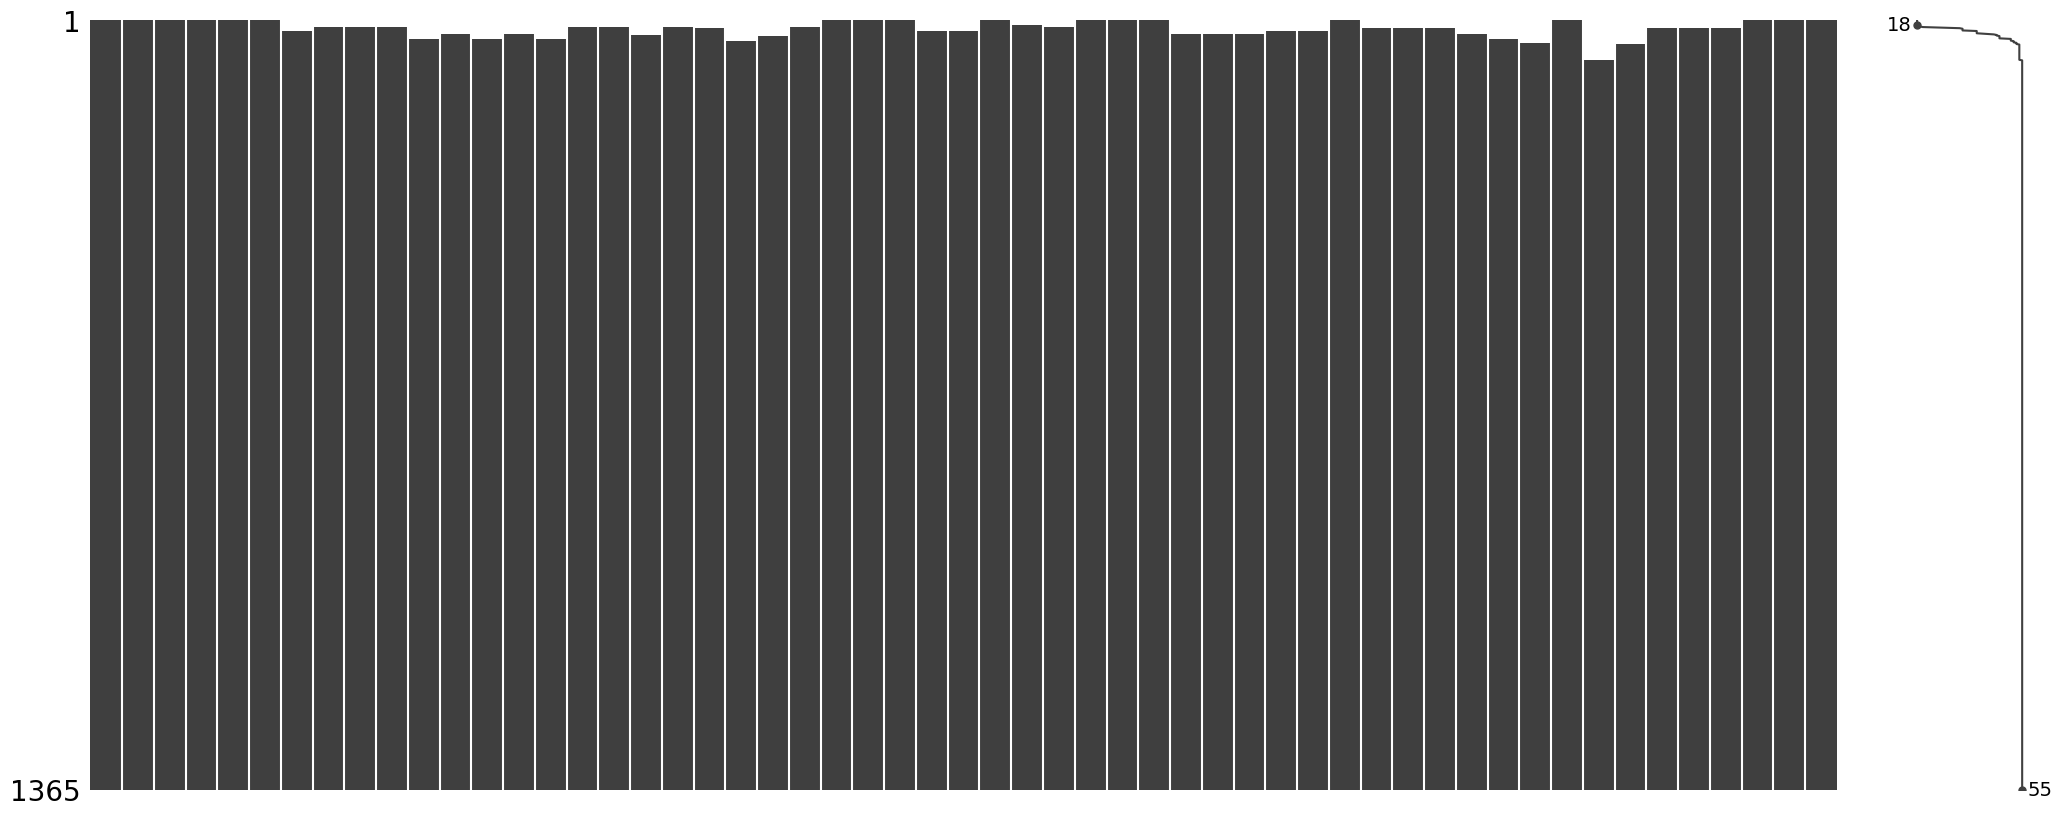

In [93]:
msno.matrix(data)

## Functions

#### subhag trend

In [94]:
def ghost_trend_signal(data, resolution=60, fast_length=3, slow_length=10):
    src = data.close
    trend_60 = ((ta.trend.ema_indicator(src, fast_length) - ta.trend.ema_indicator(src, slow_length))/src)*100
    prev_trend_60 = ((ta.trend.ema_indicator(src.shift(5), fast_length) - ta.trend.ema_indicator(src.shift(5), slow_length))/src.shift(5))*100
    trend_status_60 = [1 if trend_60[i] > prev_trend_60[i] else -1 for i in range(len(data))]
    return pd.DataFrame({'timestamp': data.timestamp,'subhag_signal': trend_status_60})


In [95]:
data_g_r = ghost_trend_signal(data, resolution=60, fast_length=3, slow_length=10)

In [96]:
data_g_r.rename(columns={'timestamp': 'time_g_r'}, inplace=True)

In [97]:
data = pd.merge(data, data_g_r, left_index=True, right_index=True)

In [98]:
data = data.drop(["time_g_r"],axis=1)

#### Fisher transform

In [99]:
def highes(data, length):
    return np.array( [0]*length + [ np.max(data[i-length+1: i+1]) for i in range(length, len(data))])
def lowes(data, length):
    return np.array( [0]*length + [ np.min(data[i-length+1: i+1]) for i in range(length, len(data))])
def fisher_transform(df, len_=9):
    high, low = df.high, df.low
    hl2 = (high+low)/2
    high_ = highes(hl2, len_)
    low_ = lowes(hl2, len_)
    def round_(val):
        return .999 if val > .99 else -.999 if val < -.99 else val
    value, fish1 = [0.0], [0.0]
    for i in range(1, len(hl2)):
        value.append(round_(.66 * ((hl2[i] - low_[i]) / (high_[i] - low_[i]) - .5) + .67 * value[i-1]))
        fish1.append(.5 * np.log((1 + value[i]) / (1 - value[i])) + .5 * fish1[i-1])
    fish1 = pd.Series(fish1)
    fish2 = fish1.shift().fillna(method='bfill')
    return pd.DataFrame({'timestamp': df.timestamp,
                         'Fisher': np.round(fish1, 5),
                         'Fisher_trigger': np.round(fish2, 5)})

In [100]:
fisher_data = fisher_transform(data, len_=9)

/tmp/ipykernel_16643/3376831689.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  value.append(round_(.66 * ((hl2[i] - low_[i]) / (high_[i] - low_[i]) - .5) + .67 * value[i-1]))


In [101]:
fisher_data.rename(columns={'timestamp': 'time_fish'}, inplace=True)

In [102]:
data = pd.merge(data, fisher_data, left_index=True, right_index=True)

In [103]:
data = data.drop(["time_fish"],axis=1)

In [104]:
data

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,...,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger
0,2019-09-08 03:00:00,10000.00,10412.65,10000.00,10391.63,3096.291,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2978.43,2.25,1.70,-1,0.00000,0.00000
1,2019-09-09 03:00:00,10316.62,10475.54,10077.22,10307.00,14824.373,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2978.43,2.25,1.70,-1,3.80020,0.00000
2,2019-09-10 03:00:00,10307.00,10382.97,9940.87,10102.02,9068.955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2979.39,2.25,1.70,-1,5.70030,3.80020
3,2019-09-11 03:00:00,10094.27,10293.11,9884.31,10159.55,10897.922,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3000.93,2.25,1.70,-1,6.65035,5.70030
4,2019-09-12 03:00:00,10163.06,10450.13,10042.12,10415.13,15609.634,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3009.57,2.25,1.70,-1,7.12538,6.65035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,2023-05-30 03:00:00,27722.10,28038.60,27530.00,27680.10,334379.313,0.035793,1.970887e+07,53.201891,27036.666041,...,-0.180711,0.133550,0.930654,1.064204,4205.52,5.25,5.15,1,0.79356,0.36538
1361,2023-05-31 03:00:00,27680.00,27825.00,26826.00,27201.10,471381.890,0.051585,-1.536268e+07,43.574365,27049.705093,...,-0.163558,0.057212,0.970178,1.027390,4179.83,5.25,5.15,1,0.87678,0.79356
1362,2023-06-01 03:00:00,27201.10,27347.90,26600.00,26805.30,404787.572,-0.018570,-3.605585e+07,44.812701,27058.187222,...,-0.150931,0.012373,1.012840,1.025213,4221.02,5.25,5.08,1,0.68976,0.87678
1363,2023-06-02 03:00:00,26805.30,27290.00,26477.60,27227.80,391110.093,0.044282,-7.298730e+06,45.573710,27064.677674,...,-0.138612,-0.002197,0.989760,0.987563,4282.37,5.25,5.08,-1,0.42282,0.68976


#### Super Trend

In [105]:
def tr(high, low, close):
    hl = np.abs(high-low)
    hc = np.abs(high-close.shift())
    lc = np.abs(low-close.shift())
    ranges = pd.concat([hl, hc, lc], axis=1)
    tr = np.max(ranges, axis=1)
    return pd.Series(tr)
def supertrend(df, Period=21, Multiplier=1.0):
    high, low, close = df.high, df.low, df.close
    src = (high+low)/2
    atr2 = ta.trend.sma_indicator(tr(high, low, close), Period, True)
    atr= ta.volatility.average_true_range(high, low, close, Period, True)
    up, dn = [0], [0]
    trend = [1]
    trend_line = [0]
    for i in range(1, len(close)):
        up_=src[i]-(Multiplier*atr[i])
        up1 = up[i-1]
        up.append(max(up_,up1) if close[i-1] > up1 else up_ )
        dn_ = src[i]+(Multiplier*atr[i])
        dn1 = dn[i-1]
        dn.append(min(dn_, dn1) if close[i-1] < dn1 else dn_)
        trend.append(1 if trend[i-1]==-1 and close[i] > dn1 else -1 if trend[i-1]==1 and close[i] < up1 else trend[i-1])
    return trend

In [106]:
supertrend = supertrend(data)

In [107]:
data['supertrend'] = supertrend

#### choppiness index

In [108]:
def highes(data, length):
    return np.array( [0]*length + [ np.max(data[i-length+1: i+1]) for i in range(length, len(data))])
def lowes(data, length):
    return np.array( [0]*length + [ np.min(data[i-length+1: i+1]) for i in range(length, len(data))])
def chop_index(df, length = 14):
    high, low, close = df.high, df.low, df.close
    atr = ta.volatility.average_true_range(high, low, close, 1).bfill()
    atr_sum = atr.rolling(length).sum().bfill()
    h = highes(high, length)
    l = lowes(low, length)
    ci = 100 * np.log10(atr_sum/(h-l)) / np.log10(length)
    return ci

In [109]:
chop_index = chop_index(data)

In [110]:
data['chop_index'] = list(chop_index)

#### Velocity Function

In [111]:
## Ema Function ##
def EMA(src, len_):
    return ta.trend.ema_indicator(src, len_).fillna(method='bfill')
## Velocity Function ##
def t3_velocity(df, len_=10, vfactor=1):
    Data = df.close
    x1 = (EMA(Data,len_))*(1+vfactor)
    x2 = (EMA(EMA(Data,len_),len_))*vfactor
    gd = x1 - x2
    x11 = (EMA(gd,len_))*(1+vfactor)
    x21 = (EMA(EMA(gd,len_),len_))*vfactor
    gd1 = x11 - x21
    x12 = (EMA(gd1,len_))*(1+vfactor)
    x22 = (EMA(EMA(gd1,len_),len_))*vfactor
    first = x12 - x22
    y1 = (EMA(Data,len_))*(1+vfactor/2)
    y2 = (EMA(EMA(Data,len_),len_))*vfactor/2
    ygd = y1-y2
    y11 = (EMA(ygd,len_))*(1+vfactor/2)
    y21 = (EMA(EMA(ygd,len_),len_))*vfactor/2
    ygd1 = y11-y21
    y12 = (EMA(ygd1,len_))*(1+vfactor/2)
    y22 = (EMA(EMA(ygd1,len_),len_))*vfactor/2
    second1 = y12-y22
    S = first - second1.shift(1)
    c = [1 if s > 0 else -1 for s in S]
    df = pd.DataFrame({'time': df.timestamp, 't3velocity_color': c})
    return df

In [112]:
velo_data = t3_velocity(data)

In [113]:
velo_data.head(1)

,time,t3velocity_color
0,2019-09-08 03:00:00,-1


In [114]:
velo = velo_data['t3velocity_color'].tolist()

In [115]:
data['Velocity'] = velo

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1364
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   1365 non-null   datetime64[ns]
 1   open                        1365 non-null   float64       
 2   high                        1365 non-null   float64       
 3   low                         1365 non-null   float64       
 4   close                       1365 non-null   float64       
 5   volume                      1365 non-null   float64       
 6   volume_CMF                  1346 non-null   float64       
 7   volume_FII                  1352 non-null   float64       
 8   volume_MFI                  1352 non-null   float64       
 9   volume_VWA                  1352 non-null   float64       
 10  mom_AOI                     1332 non-null   float64       
 11  mom_PPO                     1340 non-null   float64     

In [117]:
data_check(data)

Shape: (1365, 61)
Duplicates: 0
Duplicate timestamps 0
Total amount of NaN: 830


In [118]:
import datetime

now = datetime.datetime.now()
now = now.strftime("%Y%m%d-%H%M%S")
now

'20230613-130102'

In [119]:
data = data.dropna().reset_index(drop=True)

data.to_csv(f'../raw_data/{now}-hourly-processed-data.csv', index=False)

In [120]:
# load_df = pd.read_csv(f'../raw_data/{now}-hourly-processed-data.csv')
# data_check(load_df)

In [121]:
# load_df.info()

In [122]:
# load_df['timestamp'] = pd.to_datetime(load_df['timestamp'])
# load_df.info()

In [123]:
# daily_df = load_df[load_df['timestamp'].dt.hour == 0].reset_index(drop=True)
# daily_df

In [124]:
# daily_df.to_csv(f'../raw_data/{now}-daily-processed-data.csv', index=False)